In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/ML-Project-new/
#!git clone https://github.com/philferriere/tfoptflow


/content/drive/MyDrive/ML-Project-new


In [2]:
!pip install tensorflow==1.15
!pip install numpy==1.19

In [3]:
import sys
if '/content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow' not in sys.path:
  sys.path.append('/content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow'); #To add this path to module search path
from __future__ import absolute_import, division, print_function
from copy import deepcopy
from skimage.io import imread
from model_pwcnet import ModelPWCNet, _DEFAULT_PWCNET_TEST_OPTIONS
from visualize import display_img_pairs_w_flows
print(sys.path)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow']


In [4]:
# TODO: Set device to use for inference
# Here, we're using a GPU (use '/device:CPU:0' to run inference on the CPU)
gpu_devices = ['/device:GPU:0']  
controller = '/device:GPU:0'

# TODO: Set the path to the trained model (make sure you've downloaded it first from http://bit.ly/tfoptflow)
#ckpt_path = './models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000'
ckpt_path = '/content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow/pretrained-model/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000'

In [5]:
# Build a list of image pairs to process
import os
img_pairs = []
img_pairs_inv = []
#image_path1 = f'./samples/mpisintel_test_clean_ambush_1_frame_00{pair:02d}.png'
image_dir = '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/'
#image_dir = '/content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow/samples/'
num_images = len([name for name in os.listdir(image_dir) if os.path.isfile(image_dir+name)])
num_images = 4;
print("Number of images: ",num_images)

for pair in range(1, num_images+1):
    image_path1 = image_dir + f'0{pair:03d}.png'
    for pair2 in range(1,num_images+1):
      if not(pair2==pair):
        image_path2 = image_dir + f'0{pair2:03d}.png'
        #image_path1 = image_dir + f'mpisintel_test_clean_ambush_1_frame_00{pair:02d}.png'
        #image_path2 = image_dir + f'mpisintel_test_clean_ambush_1_frame_00{pair+1:02d}.png'
        image1, image2 = imread(image_path1), imread(image_path2)
        img_pairs.append((image1, image2))
        img_pairs_inv.append((image2,image1))


Number of images:  4


Adding gaussian noise to original image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image pair shape:
(12, 2, 240, 352, 3)
Noisy image pair shape:
(12, 2, 240, 352, 3)


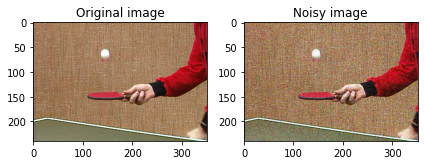

[[[119.51433007 130.82420726  79.64671841]
  [157.95494639 134.50267216 142.35237774]
  [171.37543525 116.37529138  90.57913098]
  ...
  [159.31435492  29.59351614  32.75144525]
  [178.56984047 -27.93261753  54.18301242]
  [136.33793253 -28.98093296  43.19780024]]

 [[161.5636015  152.22602886  92.15566868]
  [144.40975238 140.56864317 137.48602409]
  [215.23834988 144.34567246 167.34075859]
  ...
  [158.70560251  36.40570985 -15.71759154]
  [150.46506828   3.32414427  21.44819505]
  [191.95734815 -12.5917063   40.71774706]]

 [[210.18129003 171.07939126 117.88243125]
  [179.15607934 131.21312183  95.56967148]
  [186.23646299 107.33234853  45.98045311]
  ...
  [143.44270007  -7.79057293  10.23750751]
  [137.93896691  33.89308768  32.04192496]
  [152.33938174  21.34972959  65.96857132]]

 ...

 [[171.34386824 125.75212758 112.14231847]
  [142.7463493  119.39545095  91.76716373]
  [ 97.24346525 106.97962249 108.44916806]
  ...
  [181.61559912 145.3060662  155.56309993]
  [160.97557258 15

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def add_gaussian_noise(x):
  stddev=25
  #return x + np.random.normal(size=x.shape)*(stddev/255.0)
  return x + np.random.normal(0,stddev,size=x.shape)

noisy_img_pairs = []
noisy_img_pairs_inv = []
original_image_dir = '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/'
for pair in range(1,num_images+1):
  orig_image_path1 = original_image_dir + f'0{pair:03d}.png'
  for pair2 in range(1,num_images+1):
    if not(pair2==pair):
      orig_image_path2 = original_image_dir + f'0{pair2:03d}.png'
      noisy_image1,noisy_image2 = add_gaussian_noise(imread(orig_image_path1)), add_gaussian_noise(imread(orig_image_path2))
      noisy_img_pairs.append((noisy_image1,noisy_image2))
      noisy_img_pairs_inv.append((noisy_image2,noisy_image1))

print("Original image pair shape:")
print(np.shape(img_pairs))
print("Noisy image pair shape:")
print(np.shape(noisy_img_pairs))
fig = plt.figure()
axes = []
axes.append(fig.add_subplot(1,2,1))
axes[-1].set_title("Original image")
plt.imshow(img_pairs[0][0]/255)
axes.append(fig.add_subplot(1,2,2))
axes[-1].set_title("Noisy image")
plt.imshow(noisy_img_pairs[0][0]/255)
fig.tight_layout()
plt.show()
print(noisy_image1)

In [7]:
# Configure the model for inference, starting with the default options
nn_opts = deepcopy(_DEFAULT_PWCNET_TEST_OPTIONS)
nn_opts['verbose'] = True
nn_opts['ckpt_path'] = ckpt_path
nn_opts['batch_size'] = 1
nn_opts['gpu_devices'] = gpu_devices
nn_opts['controller'] = controller

# We're running the PWC-Net-large model in quarter-resolution mode
# That is, with a 6 level pyramid, and upsampling of level 2 by 4 in each dimension as the final flow prediction
nn_opts['use_dense_cx'] = True
nn_opts['use_res_cx'] = True
nn_opts['pyr_lvls'] = 6
nn_opts['flow_pred_lvl'] = 2

# The size of the images in this dataset are not multiples of 64, while the model generates flows padded to multiples
# of 64. Hence, we need to crop the predicted flows to their original size
nn_opts['adapt_info'] = (1, 436, 1024, 2)

In [8]:
# Instantiate the model in inference mode and display the model configuration
nn = ModelPWCNet(mode='test', options=nn_opts)
nn.print_config()







Building model...


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.

... model built.

Loading model checkpoint /content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow/pretrained-model/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000 for eval or testing...

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow/pretrained-model/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000
... model loaded

Model Configuration:
  verbose                True
  ckpt_path              /content/drive/MyDrive/ML-Project-new/tfoptflow/tfoptflow/pretrained-model/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000
  x_dtype                <dtype: 'float32'>
  x_shape                [2, None, None, 3]
  y_dtype                <dtype: 'float32'>
  y_shape              

In [13]:
import matplotlib.pyplot as plt
from optflow import flow_to_img
def plot_img_pairs_w_flows_gray(
        img_pairs,
        flow_pyrs=None,
        num_lvls=0,
        flow_preds=None,
        flow_gts=None,
        titles=None,
        info=None,
        flow_mag_max=None):
    """Plot the given set of image pairs, optionally with flows and titles.
    Args:
        img_pairs: image pairs in [batch_size, 2, H, W, 3] or list([2, H, W, 3]) format.
        flow_pyrs: optional, predicted optical flow pyramids [batch_size, H, W, 2] or list([H, W, 2]) format.
        num_lvls: number of levels to show per pyramid (flow_pyrs must be set)
        flow_preds: optional, predicted flows in [batch_size, H, W, 2] or list([H, W, 2]) format.
        flow_gts: optional, groundtruth flows in [batch_size, H, W, 2] or list([H, W, 2]) format.
        titles: optional, list of image and flow IDs to display with each image.
        info: optional, stats to display above predicted flow
        flow_mag_max: Max flow to map to 255
    Returns:
        plt: plot
    """
    # Setup drawing canvas
    fig_height, fig_width = 5, 5
    row_count = len(img_pairs)
    col_count = 2
    if flow_preds is not None:
        col_count += 1
    if flow_gts is not None:
        col_count += 1
    if flow_pyrs is not None:
        row_count += len(img_pairs)
        jump = num_lvls - col_count
        col_count = max(num_lvls, col_count)
    plt.figure(figsize=(fig_width * col_count, fig_height * row_count))

    # Plot img_pairs inside the canvas
    plot = 1
    for row in range(len(img_pairs)):
        # Plot image pair
        plt.subplot(row_count, col_count, plot)
        if titles is not None:
            plt.title(titles[row][0], fontsize=fig_width * 2)
        plt.axis('off')
        plt.imshow(img_pairs[row][0]/255)
        plt.subplot(row_count, col_count, plot + 1)
        if titles is not None:
            plt.title(titles[row][1], fontsize=fig_width * 2)
        plt.axis('off')
        plt.imshow(img_pairs[row][1]/255)
        plot += 2

        # Plot predicted flow, if any
        if flow_preds is not None:
            plt.subplot(row_count, col_count, plot)
            title = "predicted flow " + info[row] if info is not None else "predicted flow"
            plt.title(title, fontsize=fig_width * 2)
            plt.axis('off')
            print("Pruning flow_to_img")
            plt.imshow(flow_to_img(flow_preds[row], flow_mag_max=flow_mag_max)[:,:,0]/255,cmap='gray')
            plot += 1

        # Plot groundtruth flow, if any
        if flow_gts is not None:
            plt.subplot(row_count, col_count, plot)
            plt.title("groundtruth flow", fontsize=fig_width * 2)
            plt.axis('off')
            plt.imshow(flow_to_img(flow_gts[row], flow_mag_max=flow_mag_max)/255)
            plot += 1

        # Plot the flow pyramid on the next row
        if flow_pyrs is not None:
            if jump > 0:
                plot += jump
            for lvl in range(num_lvls):
                plt.subplot(row_count, col_count, plot)
                plt.title(f"level {len(flow_pyrs[row]) - lvl + 1}", fontsize=fig_width * 2)
                plt.axis('off')
                plt.imshow(flow_to_img(flow_pyrs[row][lvl], flow_mag_max=flow_mag_max)/255)
                plot += 1
            if jump < 0:
                plot -= jump

    plt.tight_layout()
    return plt
    
def display_img_pairs_w_flows_new(
        img_pairs,
        flow_preds=None,
        flow_gts=None,
        titles=None,
        info=None,
        flow_mag_max=None):
    """Display the given set of image pairs, optionally with flows and titles.
    Args:
        img_pairs: image pairs in [batch_size, 2, H, W, 3] or list([2, H, W, 3]) format.
        flow_preds: optional, predicted flows in [batch_size, H, W, 2] or list([H, W, 2]) format.
        flow_gts: optional, groundtruth flows in [batch_size, H, W, 2] or list([H, W, 2]) format.
        titles: optional, list of image and flow IDs to display with each image.
        info: optional, stats to display above predicted flow
        flow_mag_max: Max flow to map to 255
    """
    #plt = plot_img_pairs_w_flows(img_pairs, None, 0, flow_preds, flow_gts, titles, info, flow_mag_max)
    print("Plotting predicted flow in grayscale")
    plt = plot_img_pairs_w_flows_gray(img_pairs, None, 0, flow_preds, flow_gts, titles, info, flow_mag_max); #Raghu
    plt.show()



Plotting predicted flow in grayscale
Pruning flow_to_img


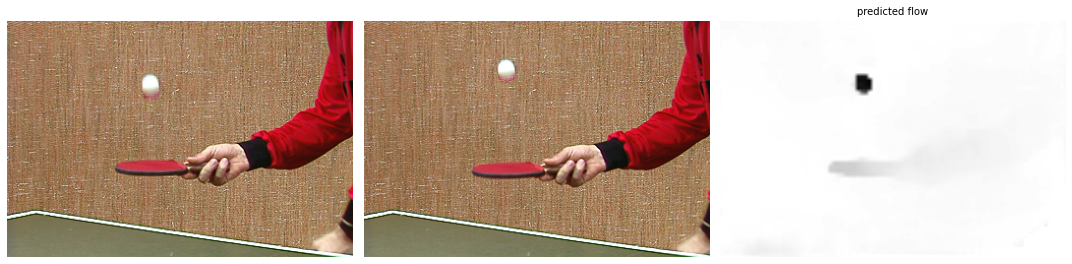

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Plotting predicted flow in grayscale
Pruning flow_to_img


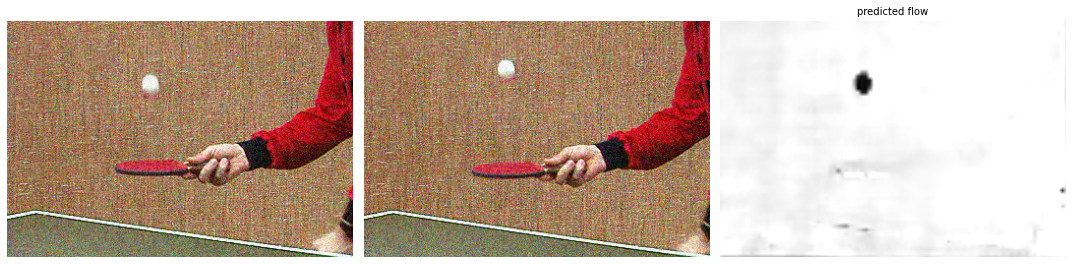

In [14]:
# Generate the predictions and display them
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
pred_labels_noisy = nn.predict_from_img_pairs(noisy_img_pairs, batch_size=1, verbose=False)
pred_labels_inv = nn.predict_from_img_pairs(img_pairs_inv, batch_size=1, verbose=False)
pred_labels_noisy_inv = nn.predict_from_img_pairs(noisy_img_pairs_inv, batch_size=1, verbose=False)


display_img_pairs_w_flows_new(img_pairs, pred_labels)
display_img_pairs_w_flows_new(noisy_img_pairs, pred_labels_noisy)

12
(12, 240, 352, 2)
Shape of stacked grid is  (240, 352, 2)
Shape of batched grid is  (1, 240, 352, 2)
Shape of stacked grid is  (240, 352, 2)
Shape of batched grid is  (1, 240, 352, 2)


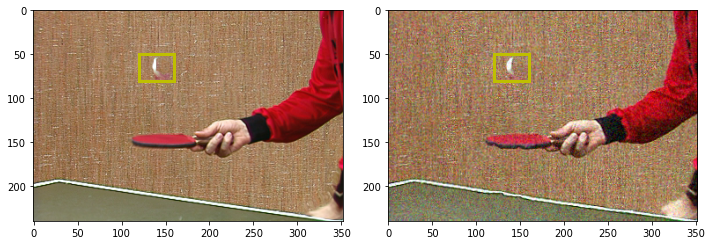

In [28]:
##Warping function written by Raghu
import numpy as np


import tensorflow as tf
"""
core_warp.py

Warp a level of image1's feature pyramid using the up-sampled flow at level+1 of image2's pyramid.

The official TF implementation requires that batch image height and width be known during graph building.
Our implementation below doesn't have the same requirements. We care about this flexibility because we sometimes train
on small image patches (e.g., (384, 448)) but do online validation on larger sizes (e.g., (436, 1024)).

Written by The TensorFlow Authors, modifications by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)

Based on:
    - https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/contrib/image/python/ops/dense_image_warp.py
    Written by The TensorFlow Authors, Copyright 2018 The TensorFlow Authors. All Rights Reserved.
    Licensed under the Apache License 2.0

TF Ref:
    - tf.contrib.image.dense_image_warp
    https://www.tensorflow.org/api_docs/python/tf/contrib/image/dense_image_warp

Notes:
    - A list of CUDA-accelerated implementations:
    https://github.com/sampepose/flownet2-tf/tree/master/src/ops/correlation
    https://github.com/jgorgenucsd/corr_tf
    https://github.com/simonmeister/UnFlow/blob/8e74f2b33138ab72d775bf1c3a9256105677834e/ops/correlation_op.cu.cc
    - Will there be a cost-volume implementation in tf.contrib at some point?
    See https://github.com/tensorflow/tensorflow/pull/21392
"""

from __future__ import absolute_import, division, print_function

from tensorflow.python.framework import constant_op
from tensorflow.python.framework import dtypes
from tensorflow.python.framework import ops

from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
import matplotlib.patches as patches

def _interpolate_bilinear(grid,
                          query_points,
                          name='interpolate_bilinear',
                          indexing='ij'):
    """Similar to Matlab's interp2 function.

    Finds values for query points on a grid using bilinear interpolation.

    Args:
      grid: a 4-D float `Tensor` of shape `[batch, height, width, channels]`.
      query_points: a 3-D float `Tensor` of N points with shape `[batch, N, 2]`.
      name: a name for the operation (optional).
      indexing: whether the query points are specified as row and column (ij),
        or Cartesian coordinates (xy).

    Returns:
      values: a 3-D `Tensor` with shape `[batch, N, channels]`

    Raises:
      ValueError: if the indexing mode is invalid, or if the shape of the inputs
        invalid.
    """
    if indexing != 'ij' and indexing != 'xy':
        raise ValueError('Indexing mode must be \'ij\' or \'xy\'')

    with ops.name_scope(name):
        grid = ops.convert_to_tensor(grid)
        query_points = ops.convert_to_tensor(query_points)
        shape = array_ops.unstack(array_ops.shape(grid))
        if len(shape) != 4:
            msg = 'Grid must be 4 dimensional. Received: '
            raise ValueError(msg + str(shape))

        batch_size, height, width, channels = shape
        query_type = query_points.dtype
        query_shape = array_ops.unstack(array_ops.shape(query_points))
        grid_type = grid.dtype

        if len(query_shape) != 3:
            msg = ('Query points must be 3 dimensional. Received: ')
            raise ValueError(msg + str(query_shape))

        _, num_queries, _ = query_shape

        alphas = []
        floors = []
        ceils = []

        index_order = [0, 1] if indexing == 'ij' else [1, 0]
        unstacked_query_points = array_ops.unstack(query_points, axis=2)

        for dim in index_order:
            with ops.name_scope('dim-' + str(dim)):
                queries = unstacked_query_points[dim]

                size_in_indexing_dimension = shape[dim + 1]

                # max_floor is size_in_indexing_dimension - 2 so that max_floor + 1
                # is still a valid index into the grid.
                max_floor = math_ops.cast(size_in_indexing_dimension - 2, query_type)
                min_floor = constant_op.constant(0.0, dtype=query_type)
                floor = math_ops.minimum(
                    math_ops.maximum(min_floor, math_ops.floor(queries)), max_floor)
                int_floor = math_ops.cast(floor, dtypes.int32)
                floors.append(int_floor)
                ceil = int_floor + 1
                ceils.append(ceil)

                # alpha has the same type as the grid, as we will directly use alpha
                # when taking linear combinations of pixel values from the image.
                alpha = math_ops.cast(queries - floor, grid_type)
                min_alpha = constant_op.constant(0.0, dtype=grid_type)
                max_alpha = constant_op.constant(1.0, dtype=grid_type)
                alpha = math_ops.minimum(math_ops.maximum(min_alpha, alpha), max_alpha)

                # Expand alpha to [b, n, 1] so we can use broadcasting
                # (since the alpha values don't depend on the channel).
                alpha = array_ops.expand_dims(alpha, 2)
                alphas.append(alpha)

        flattened_grid = array_ops.reshape(grid,
                                           [batch_size * height * width, channels])
        batch_offsets = array_ops.reshape(
            math_ops.range(batch_size) * height * width, [batch_size, 1])

        # This wraps array_ops.gather. We reshape the image data such that the
        # batch, y, and x coordinates are pulled into the first dimension.
        # Then we gather. Finally, we reshape the output back. It's possible this
        # code would be made simpler by using array_ops.gather_nd.
        def gather(y_coords, x_coords, name):
            with ops.name_scope('gather-' + name):
                linear_coordinates = batch_offsets + y_coords * width + x_coords
                gathered_values = array_ops.gather(flattened_grid, linear_coordinates)
                return array_ops.reshape(gathered_values,
                                         [batch_size, num_queries, channels])

        # grab the pixel values in the 4 corners around each query point
        top_left = gather(floors[0], floors[1], 'top_left')
        top_right = gather(floors[0], ceils[1], 'top_right')
        bottom_left = gather(ceils[0], floors[1], 'bottom_left')
        bottom_right = gather(ceils[0], ceils[1], 'bottom_right')

        # now, do the actual interpolation
        with ops.name_scope('interpolate'):
            interp_top = alphas[1] * (top_right - top_left) + top_left
            interp_bottom = alphas[1] * (bottom_right - bottom_left) + bottom_left
            interp = alphas[0] * (interp_bottom - interp_top) + interp_top

        return interp


def dense_image_warp(image, flow, name='dense_image_warp'):
    """Image warping using per-pixel flow vectors.

    Apply a non-linear warp to the image, where the warp is specified by a dense
    flow field of offset vectors that define the correspondences of pixel values
    in the output image back to locations in the  source image. Specifically, the
    pixel value at output[b, j, i, c] is
    images[b, j - flow[b, j, i, 0], i - flow[b, j, i, 1], c].

    The locations specified by this formula do not necessarily map to an int
    index. Therefore, the pixel value is obtained by bilinear
    interpolation of the 4 nearest pixels around
    (b, j - flow[b, j, i, 0], i - flow[b, j, i, 1]). For locations outside
    of the image, we use the nearest pixel values at the image boundary.


    Args:
      image: 4-D float `Tensor` with shape `[batch, height, width, channels]`.
      flow: A 4-D float `Tensor` with shape `[batch, height, width, 2]`.
      name: A name for the operation (optional).

      Note that image and flow can be of type tf.half, tf.float32, or tf.float64,
      and do not necessarily have to be the same type.

    Returns:
      A 4-D float `Tensor` with shape`[batch, height, width, channels]`
        and same type as input image.

    Raises:
      ValueError: if height < 2 or width < 2 or the inputs have the wrong number
                  of dimensions.
    """
    with ops.name_scope(name):
        batch_size,height, width, channels = array_ops.unstack(array_ops.shape(image))
        # The flow is defined on the image grid. Turn the flow into a list of query
        # points in the grid space.
        grid_x, grid_y = array_ops.meshgrid(
            math_ops.range(width), math_ops.range(height))
        stacked_grid = math_ops.cast(array_ops.stack([grid_y, grid_x], axis=2), flow.dtype)
        #stacked_grid = array_ops.stack([grid_y, grid_x], axis=2)
        print("Shape of stacked grid is ",stacked_grid.shape)
        batched_grid = array_ops.expand_dims(stacked_grid, axis=0)
        print("Shape of batched grid is ",batched_grid.shape)
        query_points_on_grid = batched_grid - flow
        query_points_flattened = array_ops.reshape(query_points_on_grid,
                                                   [batch_size,height * width, 2])
        # Compute values at the query points, then reshape the result back to the
        # image grid.
        interpolated = _interpolate_bilinear(image, query_points_flattened)
        interpolated = array_ops.reshape(interpolated,
                                         [batch_size, height, width, channels])
        return interpolated

# Convert to Tensor of type float32 for example
print(np.shape(img_pairs)[0])
print(np.shape(pred_labels))
save_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original_warped/"
save_dir_noisy = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy_warped/"
#print(np.expand_dims(img_pairs[0][0],axis=0).astype(numpy.float32))
for pair_cnt in range(0,np.shape(img_pairs)[0]):
  frame_num = (pair_cnt/num_images)+1
  warp = dense_image_warp(np.expand_dims(img_pairs[pair_cnt][0],axis=0).astype(np.float32),np.expand_dims(pred_labels[pair_cnt],axis=0).astype(np.float32))
  warp_noisy = dense_image_warp(np.expand_dims(noisy_img_pairs[pair_cnt][0],axis=0).astype(np.float32),np.expand_dims(pred_labels_noisy[pair_cnt],axis=0).astype(np.float32))
  ##img_pairs[pair_cnt][1] = img_pairs_inv[pair_cnt[0]]
  #warp_inv = dense_image_warp(np.expand_dims(img_pairs[pair_cnt][1],axis=0).astype(np.float32),np.expand_dims(pred_labels_inv[pair_cnt],axis=0).astype(np.float32))
  #warp_noisy_inv = dense_image_warp(np.expand_dims(noisy_img_pairs[pair_cnt][1],axis=0).astype(np.float32),np.expand_dims(pred_labels_noisy_inv[pair_cnt],axis=0).astype(np.float32))
  with tf.Session() as sess: 
    warp_noisy_new = warp_noisy.eval()[0]
    warp_noisy_new[warp_noisy_new<0] = 0
    warp_noisy_new[warp_noisy_new>255] = 255
    #print(warp_noisy_new/255)
    #rint(warp.eval())
    #print("Shape is ",warp_noisy.eval().shape)
    
    plt.imsave(save_dir+"frame"+str(frame_num)+"_"+str(pair_cnt)+".png",warp.eval()[0]/255)
    plt.imsave(save_dir_noisy+"frame"+str(frame_num)+"_"+str(pair_cnt)+".png",warp_noisy_new/255)

    fig = plt.figure(figsize=(10, 10))
    #fig,ax = plt.subplots()
    axes = []
    axes.append(fig.add_subplot(1,2,1))
    #axes[-1].set_title("Original motion compensated frame")
    plt.imshow(warp.eval()[0]/255)
    ax = plt.gca()
    rect = patches.Rectangle((120,50),40,30,linewidth=3,edgecolor='y',facecolor='none')
    ax.add_patch(rect)
    
    axes.append(fig.add_subplot(1,2,2))
    #axes[-1].set_title("Motion compensation for noisy frame")
    plt.imshow(warp_noisy_new/255)
    ax = plt.gca()
    rect = patches.Rectangle((120,50),40,30,linewidth=3,edgecolor='y',facecolor='none')
    ax.add_patch(rect)
    #axes.append(fig.add_subplot(4,1,3))
    #axes[-1].set_title("Warp of orig_inv")
    #plt.imshow(warp_inv.eval()[0]/255)

    #axes.append(fig.add_subplot(4,1,4))
    #axes[-1].set_title("Warp of noisy_inv")
    #plt.imshow(warp_noisy_inv.eval()[0]/255)  

    fig.tight_layout()
    plt.show()
    break
    #plt.imshow(warp.eval()[0]/255)
    #plt.show()
    #plt.imshow(warp_noisy.eval()[0]/255)
    #plt.show()
    
    #plt.imshow(img_pairs[0][0])
    #plt.show()
    #plt.imshow(img_pairs[0][1])
    #plt.show()
    

End 04/13/2022

In [ ]:
print(len(img_pairs))
print(len(pred_labels))
import numpy
print(numpy.shape(pred_labels))

3
3
(3, 240, 352, 2)


(1, 2, 240, 352, 3)
(1, 2, 240, 352, 3)
(1, 2, 240, 352, 3)
Plotting predicted flow in grayscale
Pruning flow_to_img
Pruning flow_to_img
Pruning flow_to_img


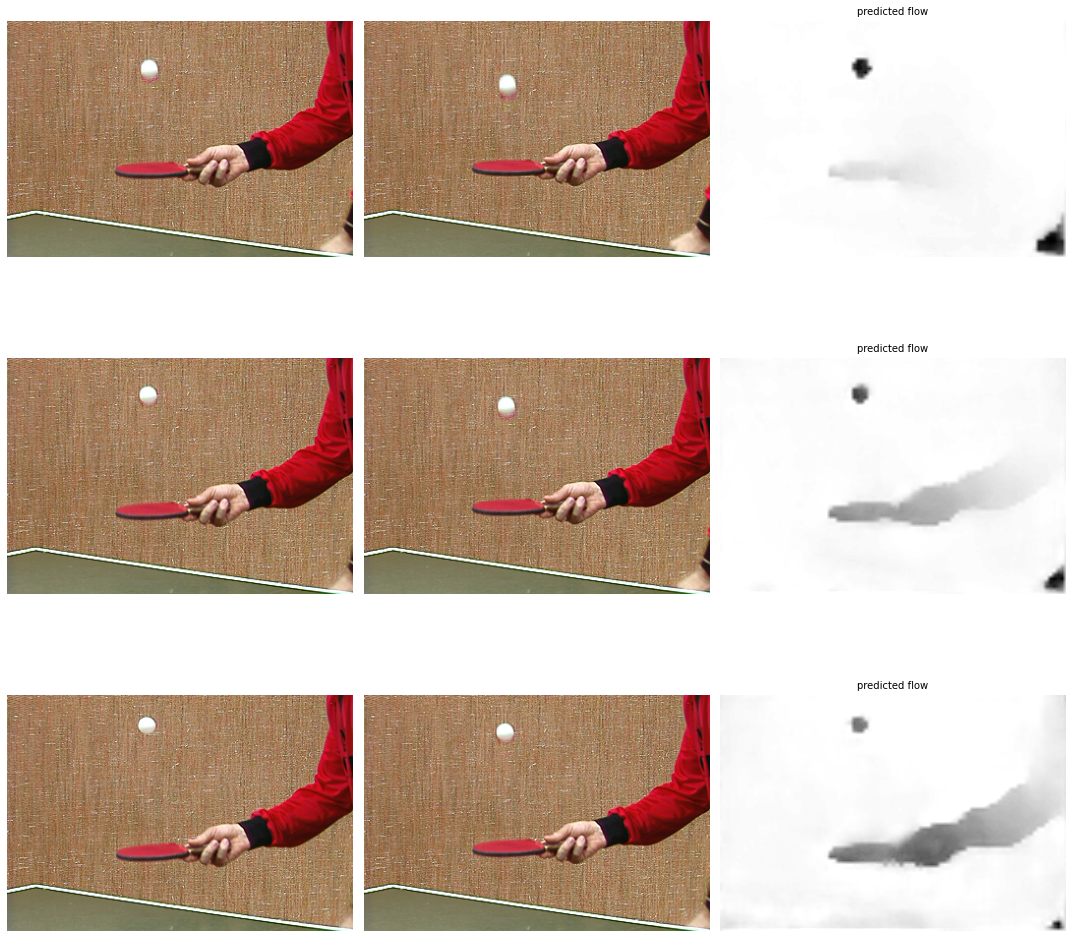

In [ ]:
# Generate the predictions and display them for backward flow
pred_labels_inv = nn.predict_from_img_pairs(img_pairs_inv, batch_size=1, verbose=False)
display_img_pairs_w_flows_new(img_pairs_inv, pred_labels_inv)

In [ ]:
import numpy as np
#print(len(np.setdiff1d(pred_labels,pred_labels_inv)))
#print(len(np.setdiff1d(pred_labels_inv,pred_labels)))
alpha1 = 0.01
alpha2 = 0.5
#binary_mask = np.zeros((len(pred_labels),pred_labels[0].shape[0],pred_labels[0].shape[1],pred_labels[0].shape[2]))
binary_mask = np.zeros((len(pred_labels),pred_labels[0].shape[0],pred_labels[0].shape[1]))
for i in range(0,len(pred_labels)):
  #print(np.linalg.norm(np.asarray(pred_labels[i])-np.asarray(pred_labels_inv[i])))
  for x in range(0,pred_labels[i].shape[0]):
    for y in range(0,pred_labels[i].shape[1]):
      #for z in range(0,pred_labels[i].shape[2]):
        #lhs = np.linalg.norm(pred_labels[i][x][y][z] + pred_labels_inv[i][x][y][z])**2
      lhs = np.linalg.norm(pred_labels[i][x][y] + pred_labels_inv[i][x][y])**2
        #rhs = alpha1*(np.linalg.norm(pred_labels[i][x][y][z])**2 + np.linalg.norm(pred_labels_inv[i][x][y][z])**2) + alpha2;
      rhs = alpha1*(np.linalg.norm(pred_labels[i][x][y])**2 + np.linalg.norm(pred_labels_inv[i][x][y])**2) + alpha2;
      if lhs < rhs:
        binary_mask[i][x][y] = 1
      else:
        binary_mask[i][x][y] = 0



0.0624138786245807 0.11404716573696594
(3, 240, 352)


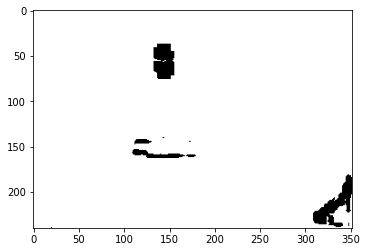

(240, 352, 3)
(240, 352)


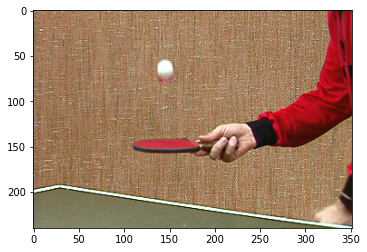

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


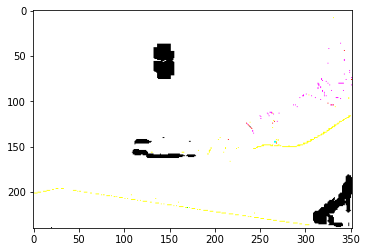

(240, 352, 3)
(240, 352, 3)


In [ ]:
import math
#print(np.shape(pred_labels))
#print(pred_labels[0][50,0,0],pred_labels_inv[0][50,0,0])
#print(pred_labels[0][50,0,1],pred_labels_inv[0][50,0,1])
#print(pred_labels[0][0,0,2],pred_labels_inv[0][0,0,2])
x = 50
y = 0
lhs = np.linalg.norm(pred_labels[i][x][y] + pred_labels_inv[i][x][y])**2
rhs = (np.linalg.norm(pred_labels[i][x][y])**2 + np.linalg.norm(pred_labels_inv[i][x][y])**2) ;
x = pred_labels[0][0,0,0]
y = pred_labels[0][0,0,1]
print(lhs,rhs)
print(np.shape(binary_mask))
plt.imshow(binary_mask[0,:,:],cmap='gray')
plt.show()
import matplotlib.pyplot as plt
print(img_pairs[0][0].shape)
print(binary_mask[0].shape)
#plt.imshow(img_pairs[0,0,:,:,0] and binary_mask[0,:,:,0])
new_img = []
for count in range(0,len(img_pairs)):
  img = np.zeros((img_pairs[0][0].shape[0],img_pairs[0][0].shape[1],img_pairs[0][0].shape[2]))
  for x in range(0,img_pairs[count][0].shape[0]):
    for y in range(0,img_pairs[count][0].shape[1]):
      #for z in range(0,img_pairs[i][0].shape[2]-1):
      if binary_mask[count][x,y] == 1:
        #print(img_pairs[0][0])
        for color in range(0,img_pairs[count][0].shape[2]):
          img[x,y,color] = img_pairs[count][0][x,y,color].copy()
  new_img.append(img)

plt.imshow(img_pairs[0][0])
plt.show()
plt.imshow(new_img[0])
plt.show()
print(np.shape(new_img[0]))
print(np.shape(img_pairs[0][0]))
#print(new_img[0])

In [ ]:
ones =0;
zeros =0;
for i in range(0,len(pred_labels)):
  #print(np.linalg.norm(np.asarray(pred_labels[i])-np.asarray(pred_labels_inv[i])))
  for x in range(0,pred_labels[i].shape[0]):
    for y in range(0,pred_labels[i].shape[1]):
      #for z in range(0,pred_labels[i].shape[2]):
      if binary_mask[i][x][y] == 1:
        ones += 1
      else:
        zeros += 1
print("Ones = ",ones)
print("Zeros = ",zeros)

Ones =  245144
Zeros =  8296


(240, 352, 3)
(240, 352)


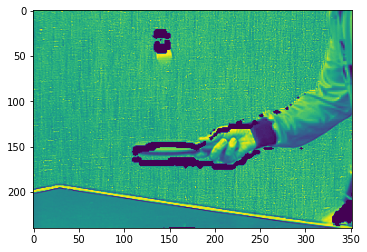

In [ ]:
import matplotlib.pyplot as plt
print(img_pairs[0][0].shape)
print(binary_mask[0].shape)
#plt.imshow(img_pairs[0,0,:,:,0] and binary_mask[0,:,:,0])
new_img = np.zeros((len(img_pairs),img_pairs[0][0].shape[0],img_pairs[0][0].shape[1]))
for i in range(0,len(img_pairs)):
  for x in range(0,img_pairs[i][0].shape[0]):
    for y in range(0,img_pairs[i][0].shape[1]):
      #for z in range(0,img_pairs[i][0].shape[2]-1):
      if binary_mask[i,x,y] == 1:
        #print(img_pairs[0][0])
        new_img[i,x,y] = img_pairs[0][1][x,y,0]

plt.imshow(new_img[2,:,:])